In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# 1
Write a program to segment the boat and the people on it from the background. Follow the instruction below:
Use 'boat.jpg' as input.
Apply Otsu thresholding.
Draw bounding box to identify the region where the boat and people are located.

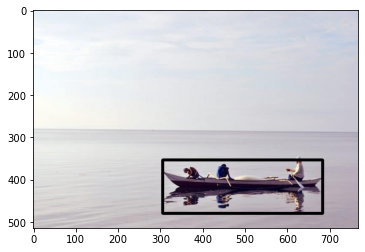

In [10]:
img = cv.imread('boat.jpg')
imgGray = cv.imread('boat.jpg',0)

# Otsu's threshold after Gaussian filtering
blur = cv.GaussianBlur(imgGray, (5,5), 0)   #reduce noise
ret, mask = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

x,y,w,h = cv.boundingRect(mask)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.rectangle(img,(x,y),(x+w,y+h),0,5)
plt.imshow(img)
plt.show()

# 2
Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [12]:
img = cv.imread('leaf.jfif')

cv.namedWindow('Q2')  

def trackbar(x):pass
    
cv.createTrackbar('erosion','Q2',0,255,trackbar)

imgCopy=img.copy()
prev_e = 0

while(True):
    cv.imshow('Q2',imgCopy)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    e = cv.getTrackbarPos('erosion', 'Q2')
    
    if e != prev_e:
        imgCopy = cv.erode(img, (1,1), iterations = e)
        prev_e = e

cv.waitKey(0)
cv.destroyAllWindows()

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Q2' in function 'cvGetTrackbarPos'


# 3
Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [16]:
porcelainlist=[]

for n in range (5):
    img = cv.imread('porcelain'+str(n+1)+'.jfif')
    porcelainlist.append(img)


0
1
2
3
4


In [17]:
def maxContour(contours):
    cnt_list = np.zeros(len(contours))
    for i in range(0,len(contours)):
        cnt_list[i] = cv.contourArea(contours[i])

    max_value = np.amax(cnt_list)
    max_index = np.argmax(cnt_list)
    cnt = contours[max_index]

    return cnt, max_index


In [18]:
porcelainlist[0].shape

(159, 318, 3)

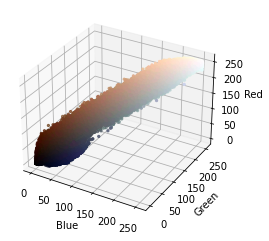

In [28]:
r, g, b = cv.split(porcelainlist[0])
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = porcelainlist[0].reshape((porcelainlist[0].shape[0]*porcelainlist[0].shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

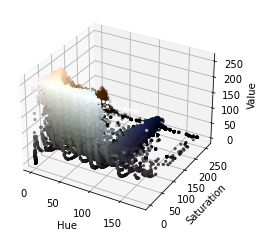

In [29]:
img_hsv = cv.cvtColor(porcelainlist[0], cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

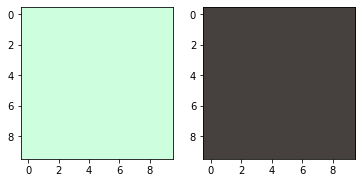

In [33]:
white_low = (0,15,90)
white_high = (100,50,255)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), white_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), white_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

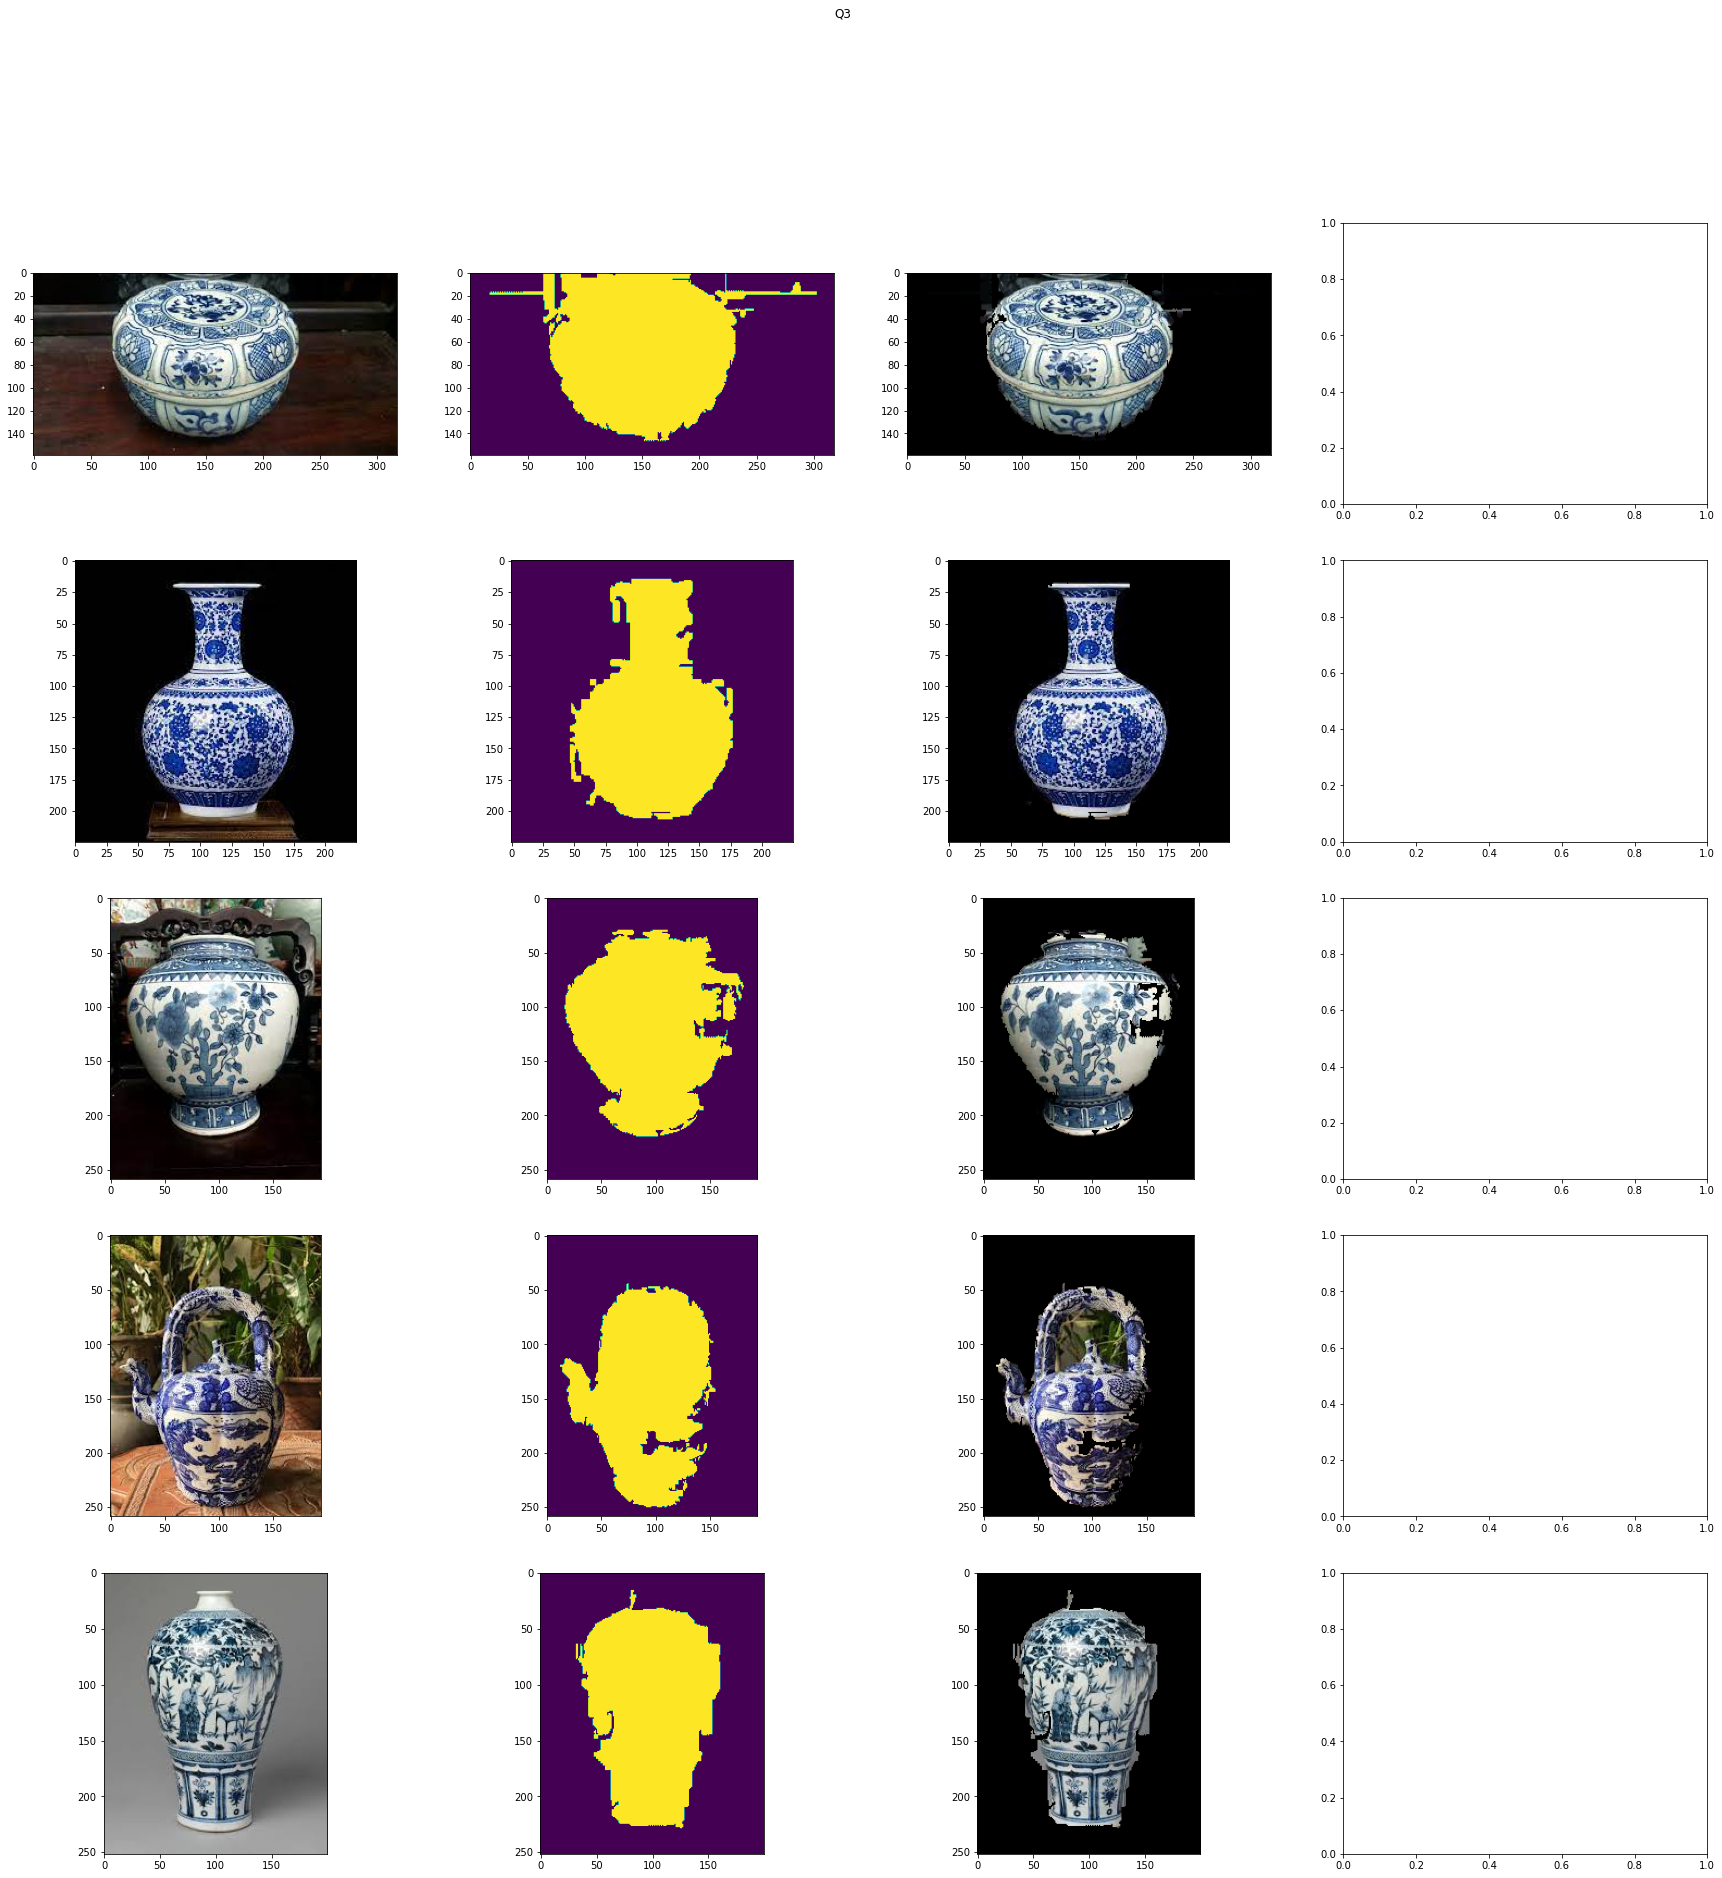

In [35]:
light_blue, dark_blue = (90,0,0),(160,255,255)
light_white, dark_white = (0,15,90),(100,50,255)

final_mask_list = []
largest_contour_mask_list = []

for i in range (5):
    img = porcelainlist[i].copy()
    img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    blue_mask = cv.inRange(img, light_blue, dark_blue)
    white_mask = cv.inRange(img, light_white, dark_white)
    combined_mask = blue_mask + white_mask
    combined_mask = cv.dilate(combined_mask, (2,2), 1)
    final_mask_list.append(combined_mask)
    
    if (int(cv.__version__[0]) > 3):
        contours, hierarchy = cv.findContours(combined_mask, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    else:
        _, contours, hierarchy = cv.findContours(combined_mask, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    largest_contour, largest_contour_index = maxContour(contours)
    final_mask = np.zeros(combined_mask.shape, dtype = np.uint8)
    cv.drawContours(final_mask, contours, largest_contour_index, (255,255,255), -1)
    largest_contour_mask_list.append(final_mask)
    
f, ax =  plt.subplots(5,4,figsize=(30,30))

for i in range (5):
    porcelainlist[i] = cv.cvtColor(porcelainlist[i], cv.COLOR_BGR2RGB)
    res =cv.bitwise_and(porcelainlist[i],porcelainlist[i],mask = largest_contour_mask_list[i])
    ax[i][0].imshow(porcelainlist[i])
    ax[i][1].imshow(largest_contour_mask_list[i])
    ax[i][2].imshow(res)
    
f.suptitle('Q3')
plt.show()